# Plotting Accuracy vs Circuit Size for Different Quantum Devices

In [ ]:
# Built-in modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
## Initialize global variables to store input parameters and output

# Initialize the DataFrame for input parameters
df_param = pd.DataFrame(columns=['key', 'target_states', 'quantum_circuit', 'num_qubits', 'depth'])

# Initialize the DataFrame for storing output
df_output = pd.DataFrame(columns=['key', 'device_name', 'transpiled_depth', 'job_id', 'counts', 'execution_time'])

print(df_param)
print(df_output)

Empty DataFrame
Columns: [key, target_states, quantum_circuit, num_qubits, depth]
Index: []
Empty DataFrame
Columns: [key, device_name, transpiled_depth, job_id, counts, execution_time]
Index: []


In [30]:
# Read Data from JSON files to DataFrames
## Do this for existing data only!
from helper import get_quantum_circuit_from_json

param_json = 'saved_data/parameters_20241208_1221.json'
output_json = 'saved_data/output_20241208_1221.json'

df_param = pd.read_json(param_json, orient="records")
df_param['quantum_circuit'] = get_quantum_circuit_from_json(df_param['quantum_circuit'])

df_output = pd.read_json(output_json, orient="records")

In [31]:
df_param = df_param[:5]
df_param

,key,target_states,quantum_circuit,num_qubits,depth
0,e0dcdfc9,[01],"((Instruction(name='h', num_qubits=1, num_clbi...",2,12
1,23caeab0,[111],"((Instruction(name='h', num_qubits=1, num_clbi...",3,18
2,a00dc22c,[1001],"((Instruction(name='h', num_qubits=1, num_clbi...",4,27
3,cdbc3c51,"[00111, 10011]","((Instruction(name='h', num_qubits=1, num_clbi...",5,38
4,0e14030c,"[011011, 101001]","((Instruction(name='h', num_qubits=1, num_clbi...",6,50


In [32]:
# Add another column for accuracy to the output dataframe
df_output['accuracy'] = 0.0
df_output['shots'] = 0
df_output.head()

,key,device_name,transpiled_depth,job_id,counts,execution_time,accuracy,shots
0,e0dcdfc9,aer_sim,6,,{'01': 1024},1970-01-01 00:18:06,0.0,0
1,23caeab0,aer_sim,10,,"{'111': 969, '001': 9, '110': 12, '011': 11, '...",1970-01-01 00:05:37,0.0,0
2,a00dc22c,aer_sim,14,,"{'1001': 986, '1101': 5, '0011': 3, '1100': 6,...",1970-01-01 00:03:21,0.0,0
3,cdbc3c51,aer_sim,20,,"{'00111': 505, '10011': 483, '10010': 2, '0110...",1970-01-01 00:05:24,0.0,0
4,0e14030c,aer_sim,26,,"{'011011': 507, '101001': 513, '111011': 1, '0...",1970-01-01 00:03:02,0.0,0


## Calculating Accuracy of Output States

In [33]:
from helper import update_accuracy_shots

update_accuracy_shots(df_output, df_param)
df_output

,key,device_name,transpiled_depth,job_id,counts,execution_time,accuracy,shots
0,e0dcdfc9,aer_sim,6,,{'01': 1024},1970-01-01 00:18:06,1.000000,1024
1,23caeab0,aer_sim,10,,"{'111': 969, '001': 9, '110': 12, '011': 11, '...",1970-01-01 00:05:37,0.946289,1024
2,a00dc22c,aer_sim,14,,"{'1001': 986, '1101': 5, '0011': 3, '1100': 6,...",1970-01-01 00:03:21,0.962891,1024
3,cdbc3c51,aer_sim,20,,"{'00111': 505, '10011': 483, '10010': 2, '0110...",1970-01-01 00:05:24,0.964844,1024
4,0e14030c,aer_sim,26,,"{'011011': 507, '101001': 513, '111011': 1, '0...",1970-01-01 00:03:02,0.996094,1024
5,e0dcdfc9,aer_noisy,12,,"{'01': 950, '11': 49, '00': 19, '10': 6}",1970-01-01 04:16:30,0.927734,1024
6,23caeab0,aer_noisy,176,,"{'000': 28, '111': 788, '101': 37, '110': 38, ...",1970-01-01 03:22:52,0.769531,1024
7,a00dc22c,aer_noisy,659,,"{'1011': 40, '1001': 427, '0110': 37, '0111': ...",1970-01-01 02:24:09,0.416992,1024
8,cdbc3c51,aer_noisy,2332,,"{'10000': 32, '11111': 37, '00110': 40, '11010...",1970-01-01 03:27:55,0.086914,1024
9,0e14030c,aer_noisy,6315,,"{'000011': 19, '111110': 13, '100110': 14, '11...",1970-01-01 02:33:09,0.030273,1024


## Filter Data for Different Devices
1. Filter output dataframe by device name.
2. Merge filtered dataframes with input parameters dataframe

In [34]:
filtered_df = {}

for device in df_output['device_name'].unique():
    print(device)
    df = df_output[df_output['device_name']==device]
    merged_df = pd.merge(df_param[['key', 'num_qubits', 'depth']],
                         df[['key', 'device_name', 'transpiled_depth', 'counts', 'execution_time', 'accuracy', 'shots']],
                         on='key')
    filtered_df[device] = merged_df

print(f"\n{filtered_df.keys()}")

aer_sim
aer_noisy
ibm_fez
ibm_torino
ibm_kyiv
ibm_brisbane
aws_local
aws_SV1
aws_Forte 1
aws_Garnet

dict_keys(['aer_sim', 'aer_noisy', 'ibm_fez', 'ibm_torino', 'ibm_kyiv', 'ibm_brisbane', 'aws_local', 'aws_SV1', 'aws_Forte 1', 'aws_Garnet'])


In [35]:
# Print any dataframe for verifying

filtered_df.get("aer_sim")

,key,num_qubits,depth,device_name,transpiled_depth,counts,execution_time,accuracy,shots
0,e0dcdfc9,2,12,aer_sim,6,{'01': 1024},1970-01-01 00:18:06,1.000000,1024
1,23caeab0,3,18,aer_sim,10,"{'111': 969, '001': 9, '110': 12, '011': 11, '...",1970-01-01 00:05:37,0.946289,1024
2,a00dc22c,4,27,aer_sim,14,"{'1001': 986, '1101': 5, '0011': 3, '1100': 6,...",1970-01-01 00:03:21,0.962891,1024
3,cdbc3c51,5,38,aer_sim,20,"{'00111': 505, '10011': 483, '10010': 2, '0110...",1970-01-01 00:05:24,0.964844,1024
4,0e14030c,6,50,aer_sim,26,"{'011011': 507, '101001': 513, '111011': 1, '0...",1970-01-01 00:03:02,0.996094,1024


## Separate Data for Simulators and Q-Hardware

In [44]:
# Storing data for simulators and quantum hardware separately
simulators = ['aer_sim', 'aer_noisy', 'aws_local', 'aws_SV1']
qhardwares = ['ibm_fez', 'ibm_torino', 'ibm_kyiv', 'ibm_brisbane', 'aws_Forte 1', 'aws_Garnet']

data = list()
for sim in simulators:
    data.append(filtered_df.get(sim))

simulator_data = pd.DataFrame()
simulator_data = pd.concat(data)

qdata = list()
for device in qhardwares:
    data = filtered_df.get(device)
    #Excpetional handling for IonQ 
    if device == 'aws_Forte 1':
        ionq = filtered_df.get(device)
        for idx, row in ionq.iterrows():
            if row['shots'] == 10:
                ionq.loc[idx, 'device_name'] = 'aws_ionq @ 10 shots' 
            if row['shots'] == 100:
                ionq.loc[idx, 'device_name'] = 'aws_ionq @ 100 shots'
        qdata.append(ionq)
    else:
        qdata.append(data)

hardware_data = pd.DataFrame()
hardware_data = pd.concat(qdata)

In [45]:
hardware_data

,key,num_qubits,depth,device_name,transpiled_depth,counts,execution_time,accuracy,shots
0,e0dcdfc9,2,12,ibm_fez,9,,NaT,0.000000,0
1,23caeab0,3,18,ibm_fez,146,,NaT,0.000000,0
2,a00dc22c,4,27,ibm_fez,500,,NaT,0.000000,0
3,cdbc3c51,5,38,ibm_fez,1958,,NaT,0.000000,0
4,0e14030c,6,50,ibm_fez,5093,,NaT,0.000000,0
0,e0dcdfc9,2,12,ibm_torino,9,"{'01': 550, '00': 161, '11': 228, '10': 85}",NaT,0.537109,1024
1,23caeab0,3,18,ibm_torino,141,"{'111': 660, '001': 59, '000': 44, '010': 39, ...",NaT,0.644531,1024
2,a00dc22c,4,27,ibm_torino,564,"{'0100': 48, '1101': 76, '1001': 255, '0001': ...",NaT,0.249023,1024
3,cdbc3c51,5,38,ibm_torino,1950,"{'10011': 23, '10010': 40, '11100': 35, '11010...",NaT,0.052734,1024
4,0e14030c,6,50,ibm_torino,5078,"{'101111': 11, '101001': 13, '010110': 20, '01...",NaT,0.022461,1024


## A) Accuracy vs Number of Qubits

### Accuracy vs Num of Qubits - Simulators with NO Noise

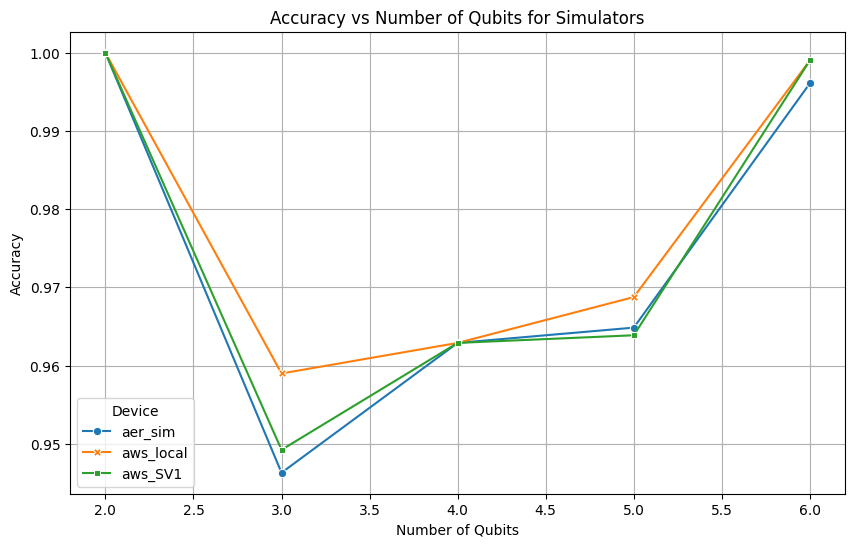

In [46]:
# Accuracy vs Num of Qubits plot for simulators

# Simulators without noise
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=simulator_data[simulator_data['device_name'].isin(['aer_sim', 'aws_local', 'aws_SV1'])],
    x="num_qubits",
    y="accuracy",
    hue="device_name",
    style='device_name', 
    markers=True, 
    dashes=False
)
plt.title("Accuracy vs Number of Qubits for Simulators")
plt.xlabel("Number of Qubits")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

### Accuracy vs Num of Qubits - Noisy Simulators

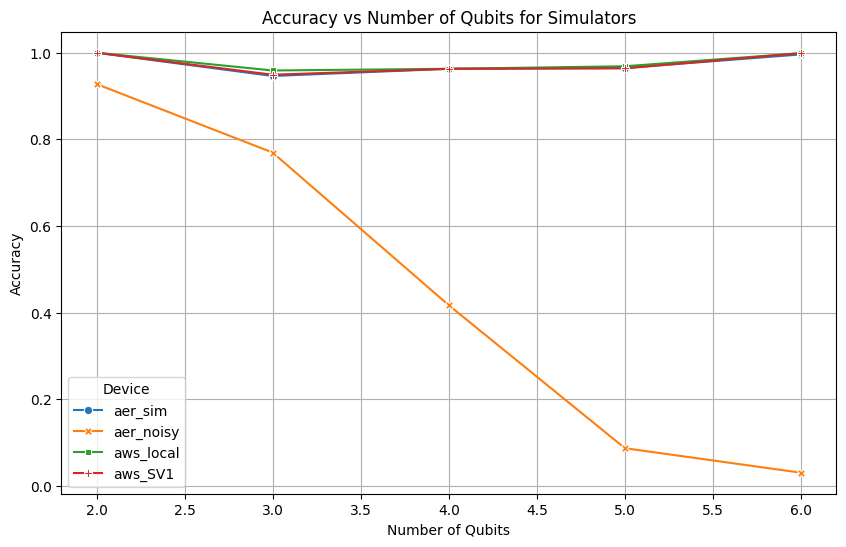

In [47]:
# Accuracy vs Num of Qubits plot for simulators

# Simulators without noise
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=simulator_data,
    x="num_qubits",
    y="accuracy",
    hue="device_name",
    style='device_name',
    markers=True,
    dashes=False
)
plt.title("Accuracy vs Number of Qubits for Simulators")
plt.xlabel("Number of Qubits")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

### Accuracy vs Num of Qubits - Q-Hardware Devices

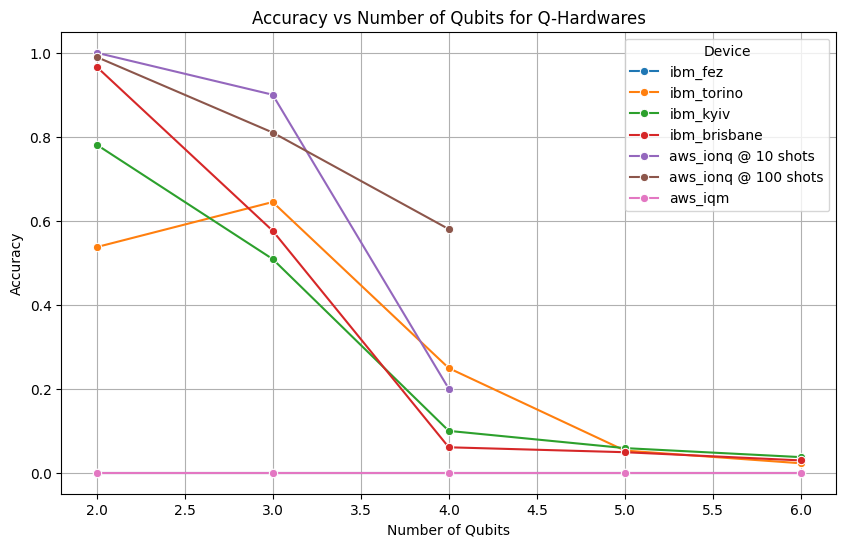

In [ ]:
# Accuracy vs Num of Qubits plot for Q-Hardwares

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=hardware_data,
    x="num_qubits",
    y="accuracy",
    hue="device_name",
    marker="o"
)
plt.title("Accuracy vs Number of Qubits for Q-Hardwares")
plt.xlabel("Number of Qubits")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

### Accuracy vs Num of Qubits - Best

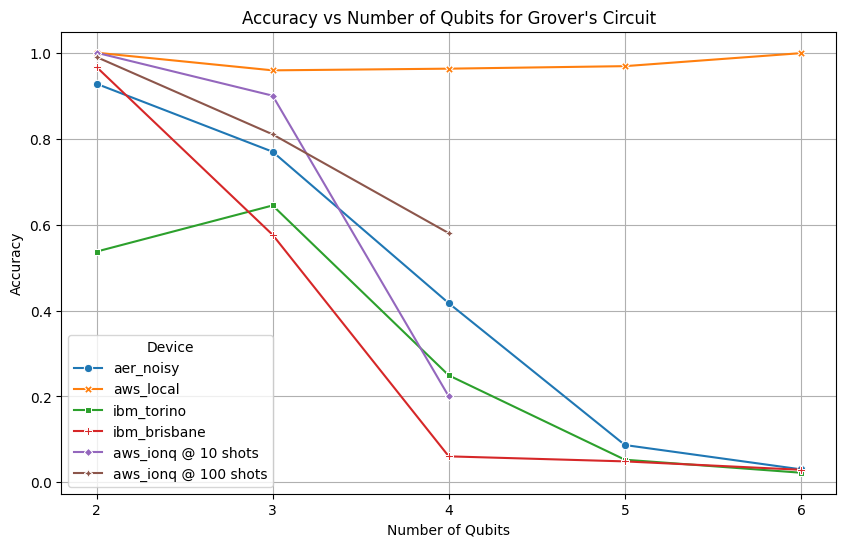

In [51]:
# Accuracy vs Num of Qubits plot for best performing devices
devices = ['aws_local','aer_noisy', 'ibm_brisbane', 'ibm_torino', 'aws_ionq @ 10 shots', 'aws_ionq @ 100 shots']

data = list()
data.append(simulator_data[simulator_data['device_name'].isin(devices)])
data.append(hardware_data[hardware_data['device_name'].isin(devices)])

df_full = pd.DataFrame()
df_full = pd.concat(data)

# Plot for best performing devices
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_full,
    x="num_qubits",
    y="accuracy",
    hue="device_name",
    style='device_name', 
    markers=True, 
    dashes=False
)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title("Accuracy vs Number of Qubits for Grover's Circuit")
plt.xlabel("Number of Qubits")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

## B) Accuracy vs Circuit Depth

### Accuracy vs Circuit Depth - Simulators

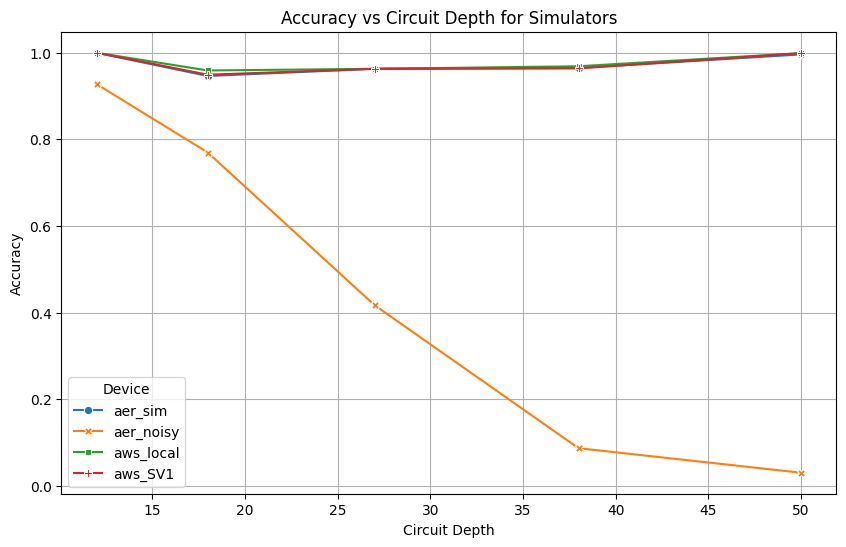

In [52]:
# Accuracy vs Num of Qubits plot for simulators

# Simulators without noise
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=simulator_data,
    x="depth",
    y="accuracy",
    hue="device_name",
    style='device_name', 
    markers=True, 
    dashes=False
)
plt.title("Accuracy vs Circuit Depth for Simulators")
plt.xlabel("Circuit Depth")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

### Accuracy vs Circuit Depth - Q-Hardware

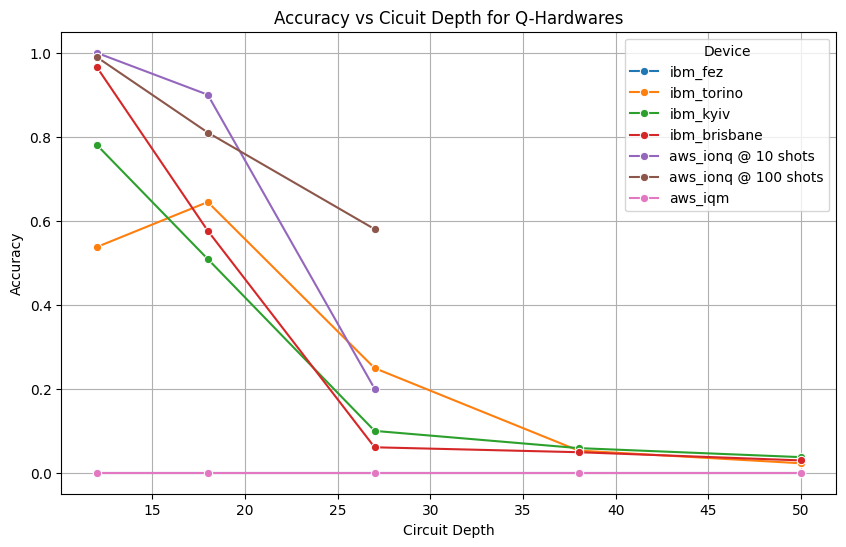

In [53]:
# Accuracy vs Num of Qubits plot for Q-Hardwares

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=hardware_data,
    x="depth",
    y="accuracy",
    hue="device_name",
    marker="o"
)
plt.title("Accuracy vs Cicuit Depth for Q-Hardwares")
plt.xlabel("Circuit Depth")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

### Accuracy vs Circuit Depth - Best

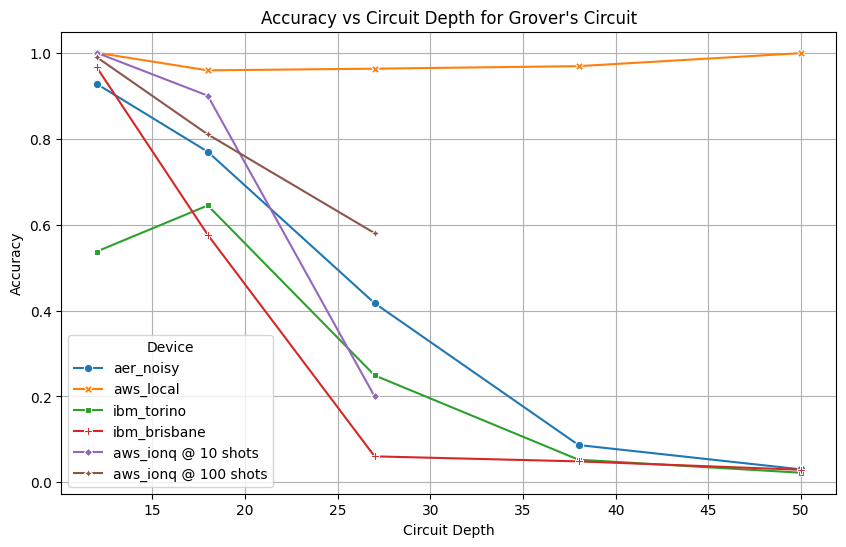

In [54]:
# Accuracy vs Num of Qubits plot for best performing devices
devices = ['aws_local','aer_noisy', 'ibm_brisbane', 'ibm_torino', 'aws_ionq @ 10 shots', 'aws_ionq @ 100 shots']

data = list()
data.append(simulator_data[simulator_data['device_name'].isin(devices)])
data.append(hardware_data[hardware_data['device_name'].isin(devices)])

df_full = pd.DataFrame()
df_full = pd.concat(data)

# Plot for best performing devices
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_full,
    x="depth",
    y="accuracy",
    hue="device_name",
    style='device_name', 
    markers=True, 
    dashes=False
)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title("Accuracy vs Circuit Depth for Grover's Circuit")
plt.xlabel("Circuit Depth")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

## C) Accuracy vs Transpiled Circuit Depth

### Accuracy vs Transpiled Circuit Depth - Simulators

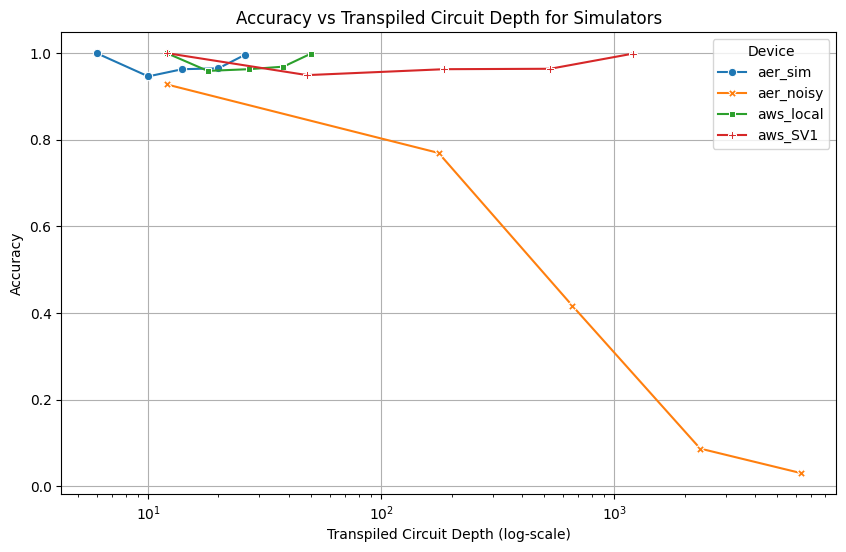

In [63]:
# Accuracy vs Num of Qubits plot for simulators

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=simulator_data,
    x="transpiled_depth",
    y="accuracy",
    hue="device_name",
    style='device_name', 
    markers=True, 
    dashes=False
)
plt.xscale("log")
plt.title("Accuracy vs Transpiled Circuit Depth for Simulators")
plt.xlabel("Transpiled Circuit Depth (log-scale)")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

### Accuracy vs Transpiled Circuit Depth - Q-Hardware

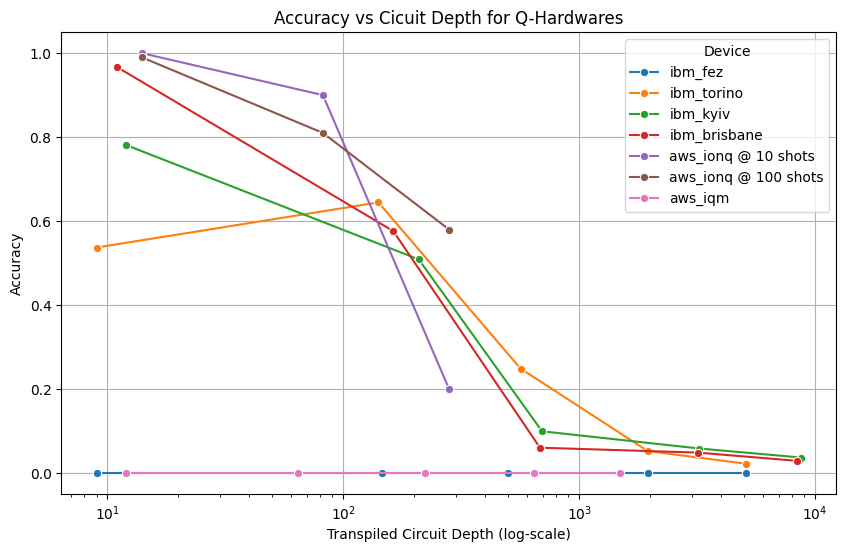

In [62]:
# Accuracy vs Num of Qubits plot for Q-Hardwares

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=hardware_data,
    x="transpiled_depth",
    y="accuracy",
    hue="device_name",
    marker="o"
)
plt.xscale("log")
plt.title("Accuracy vs Cicuit Depth for Q-Hardwares")
plt.xlabel("Transpiled Circuit Depth (log-scale)")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()

### Accuracy vs Transpiled Circuit Depth - Best

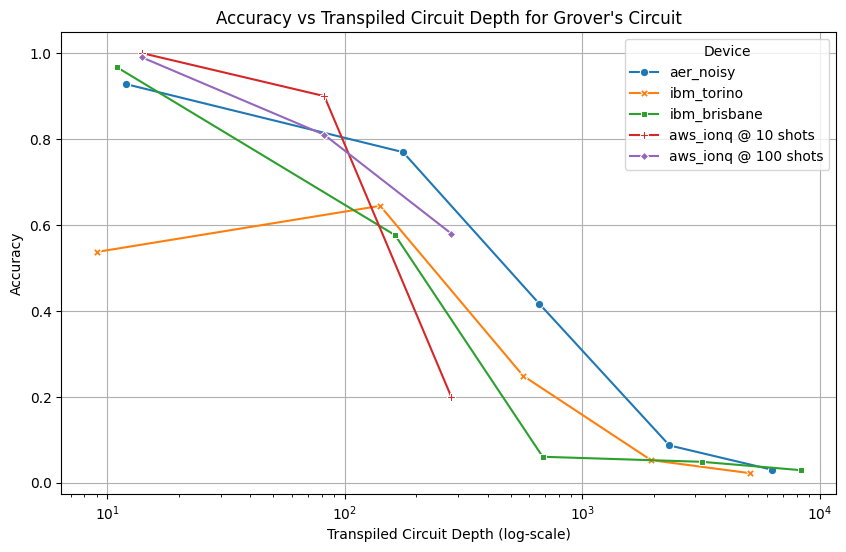

In [61]:
# Accuracy vs Num of Qubits plot for best performing devices
devices = ['aer_noisy', 'ibm_brisbane', 'ibm_torino', 'aws_ionq @ 10 shots', 'aws_ionq @ 100 shots']

data = list()
data.append(simulator_data[simulator_data['device_name'].isin(devices)])
data.append(hardware_data[hardware_data['device_name'].isin(devices)])

df_full = pd.DataFrame()
df_full = pd.concat(data)

# Plot for best performing devices
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_full,
    x="transpiled_depth",
    y="accuracy",
    hue="device_name",
    style='device_name', 
    markers=True, 
    dashes=False
)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xscale("log")
plt.title("Accuracy vs Transpiled Circuit Depth for Grover's Circuit")
plt.xlabel("Transpiled Circuit Depth (log-scale)")
plt.ylabel("Accuracy")
plt.legend(title="Device")
plt.grid(True)
plt.show()